In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import photutils
import datetime
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)


import astropy
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
from photutils.detection import DAOStarFinder
from photutils.aperture import CircularAperture, CircularAnnulus, ApertureStats, aperture_photometry
from astropy.stats import sigma_clipped_stats
from astropy.table import Column
import glob
import time
import astroalign as aa


This is like a testing function, it just shows you a plot of stars with their aperture/annulus drawn

In [18]:
def showaperture(filepath):
    image_file = get_pkg_data_filename(filepath)
    fits.info(image_file)
    image_data = fits.getdata(image_file, ext=0)
    
    hdulist = fits.open(filepath)
    data = hdulist[0].data
    median = np.median(data)
    tol = 5*median
    fwhm = 6
    dao = DAOStarFinder(tol, fwhm)
    stars = dao(data)

    positions = []

    for i in range(len(stars)):
        posn = (stars['xcentroid'][i], stars['ycentroid'][i])
        positions.append(posn)
    
    apertures = CircularAperture(positions, r=3.5*fwhm)
    annulus_apertures = CircularAnnulus(positions, r_in=3.5*fwhm, r_out=(3.5*fwhm*np.sqrt(5)))
    
    plt.imshow(image_data, cmap = 'gray')
    plt.xlim(2250, 2450)
    plt.ylim(1675, 1875)

    ap_patches = apertures.plot(color='white', lw=5,
                               label='Photometry aperture')
    ann_patches = annulus_apertures.plot(color='red', lw=2,
                                        label='Background annulus')
    handles = (ap_patches[0], ann_patches[0])
    plt.legend(loc=(0.17, 0.05), facecolor='#458989', labelcolor='white',
               handles=handles, prop={'weight': 'bold', 'size': 11})
    plt.show()


    


e.g.

Filename: /Volumes/maxdrive/AstroData/2023_1_23/Light/Blue/Reduced/Aligned/aligned_Reduced_star_Light_Blue_30_secs_001.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      57   (4656, 3520)   float32   


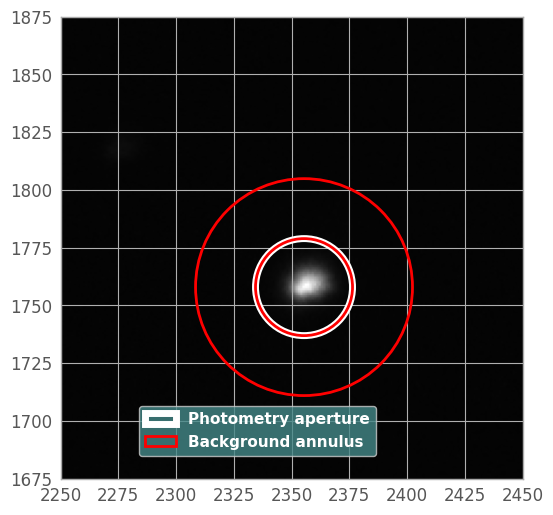

In [19]:
showaperture('/Volumes/maxdrive/AstroData/2023_1_23/Light/Blue/Reduced/Aligned/aligned_Reduced_star_Light_Blue_30_secs_001.fits')

This function returns the position and sum of the brightest star in a given image and adjusts for exposure time... my hunch is that RZ Cep is the brightest star in every image, I've tested this with some other code and that seems to be a fair assumption (I think there's one image out of 110 or so where this isn't the case)

In [5]:
def mainstarstats(fitsfile):

    file = fitsfile
    image_file = get_pkg_data_filename(file)
    image_data = fits.getdata(image_file, ext=0)
    e
    filename = (file.replace("/Volumes/maxdrive/AstroData/2023_1_23/Light/Blue/Reduced/",""))
    time = date_obs[11:19]
    date = date_obs[:10]
    data = fitsFile[0].data
    median = np.median(data)
    tol = 5*median
    fwhm = 10

    dao = DAOStarFinder(tol, fwhm)
    stars = dao(data)

    positions = []

    for i in range(len(stars)):
        posn = (stars['xcentroid'][i], stars['ycentroid'][i])
        positions.append(posn)


    apertures = CircularAperture(positions, r=3.5*fwhm)
    annulus_apertures = CircularAnnulus(positions, r_in=3.5*fwhm, r_out=(3.5*fwhm*np.sqrt(5)))
    aperstats = photutils.aperture.ApertureStats(image_data, apertures)

    columns = ('id', 'mean', 'median', 'std', 'var', 'sum')
    stats_table = aperstats.to_table(columns)
    for col in stats_table.colnames:
        stats_table[col].info.format = '%.8g'  # for consistent table output
    
    stats_table.add_column(0, name= 'x')
    stats_table.add_column(0, name= 'y')
    
    for i in range(len(stats_table)):
        stats_table['x'] = positions[i][0]
        stats_table['y'] = positions[i][1]

    idx = np.argmax(stats_table['sum'])
    
    mainstarstats = stats_table[idx]
    if (fitsFile[0].header['EXPTIME'] == 45):
        mainstarstats['sum'] = (mainstarstats['sum'] * (30/45))
    return mainstarstats

You'll notice this code is almost exactly the same as above but after each iteration it appends a list with the main star's flux sum, and the time that image was taken. NOTE: This is now a bit irrelevant as it doesn't include the background subtraction, so maybe just keep scrolling

In [9]:
filepath = '/Volumes/maxdrive/AstroData/2023_1_23/Light/Luminance/Reduced/'

maxstarsums = []
filetimes = []

flist = sorted(glob.glob(filepath+"Reduced_star_Light_*.fits"))


for file in flist:
    image_file = get_pkg_data_filename(file)
    image_data = fits.getdata(image_file, ext=0)
    fitsFile = fits.open(file)
    date_obs = fitsFile[0].header['DATE-OBS']
    filename = (file.replace("/Volumes/maxdrive/AstroData/2023_1_23/Light/Blue/Reduced/",""))
    time = date_obs[11:19]
    date = date_obs[:10]
    data = fitsFile[0].data
    median = np.median(data)
    tol = 5*median
    fwhm = 10
    
    dao = DAOStarFinder(tol, fwhm)
    stars = dao(data)

    positions = []

    for i in range(len(stars)):
        posn = (stars['xcentroid'][i], stars['ycentroid'][i])
        positions.append(posn)
        
    apertures = CircularAperture(positions, r=3.5*fwhm)
    annulus_apertures = CircularAnnulus(positions, r_in=3.5*fwhm, r_out=(3.5*fwhm*np.sqrt(5)))
    aperstats = photutils.aperture.ApertureStats(image_data, apertures)
    
    columns = ('id', 'mean', 'median', 'std', 'var', 'sum')
    stats_table = aperstats.to_table(columns)
    for col in stats_table.colnames:
        stats_table[col].info.format = '%.8g'  # for consistent table output
    
        
    idx = np.argmax(stats_table['sum'])
    mainstarstats = stats_table[idx]
    
    if (fitsFile[0].header['EXPTIME'] == 45):
        filetimes.append([filename, date+" "+time, (mainstarstats['sum']*(30/45))])
        print (str(filetimes[(len(filetimes)-1)])+" SCALED")
    else:
        filetimes.append([filename, date+" "+time, (mainstarstats['sum'])])    
        print (filetimes[(len(filetimes)-1)])
    

    


    
    

df = pd.DataFrame (filetimes, columns = ['file', 'datetime', 'sum'])
df['datetime'] = pd.to_datetime(df['datetime'])
df_sorted = df.sort_values('datetime')
df_sorted

['Reduced_star_Light_Blue_30_secs_001.fits', '2023-01-23 20:56:39', 11905.140832650732]
['Reduced_star_Light_Blue_30_secs_002.fits', '2023-01-23 20:58:53', 11740.484741377772]
['Reduced_star_Light_Blue_30_secs_003.fits', '2023-01-23 21:01:05', 11423.99626686062]
['Reduced_star_Light_Blue_30_secs_004.fits', '2023-01-23 21:03:19', 10881.147474959962]
['Reduced_star_Light_Blue_30_secs_005.fits', '2023-01-23 21:05:30', 10099.282417906703]
['Reduced_star_Light_Blue_30_secs_006.fits', '2023-01-23 21:07:42', 9404.919227046277]
['Reduced_star_Light_Blue_30_secs_007.fits', '2023-01-23 21:09:57', 8411.575298607411]
['Reduced_star_Light_Blue_30_secs_008.fits', '2023-01-23 21:12:09', 8283.259179542583]
['Reduced_star_Light_Blue_30_secs_009.fits', '2023-01-23 21:14:20', 8113.586760839295]
['Reduced_star_Light_Blue_30_secs_010.fits', '2023-01-23 21:16:31', 7919.000131844516]
['Reduced_star_Light_Blue_30_secs_011.fits', '2023-01-23 21:18:44', 7733.618415384493]
['Reduced_star_Light_Blue_30_secs_012.f

['Reduced_star_Light_Blue_45_secs_017.fits', '2023-01-23 19:33:43', 8210.224583979614] SCALED
['Reduced_star_Light_Blue_45_secs_018.fits', '2023-01-23 19:39:00', 8506.31735876196] SCALED
['Reduced_star_Light_Blue_45_secs_019.fits', '2023-01-23 19:42:02', 8535.453525826193] SCALED
['Reduced_star_Light_Blue_45_secs_020.fits', '2023-01-23 19:45:02', 8594.936551588851] SCALED
['Reduced_star_Light_Blue_45_secs_021.fits', '2023-01-23 19:48:05', 8438.481113326925] SCALED
['Reduced_star_Light_Blue_45_secs_022.fits', '2023-01-23 19:51:07', 8386.761761088297] SCALED
['Reduced_star_Light_Blue_45_secs_023.fits', '2023-01-23 19:54:09', 8483.32437235242] SCALED
['Reduced_star_Light_Blue_45_secs_024.fits', '2023-01-23 19:57:10', 8333.781003938435] SCALED
['Reduced_star_Light_Blue_45_secs_025.fits', '2023-01-23 20:00:13', 8177.5285133680345] SCALED
['Reduced_star_Light_Blue_45_secs_026.fits', '2023-01-23 20:03:15', 8052.898261019924] SCALED
['Reduced_star_Light_Blue_45_secs_027.fits', '2023-01-23 20:0

,file,datetime,sum
77,Reduced_star_Light_Blue_45_secs_001.fits,2023-01-23 18:45:01,6928.978235
78,Reduced_star_Light_Blue_45_secs_002.fits,2023-01-23 18:48:07,6936.260221
79,Reduced_star_Light_Blue_45_secs_003.fits,2023-01-23 18:51:14,7012.645148
80,Reduced_star_Light_Blue_45_secs_004.fits,2023-01-23 18:54:19,7008.504719
81,Reduced_star_Light_Blue_45_secs_005.fits,2023-01-23 18:57:12,7088.476538
...,...,...,...
72,Reduced_star_Light_Blue_30_secs_073.fits,2023-01-23 23:54:22,5447.139424
73,Reduced_star_Light_Blue_30_secs_074.fits,2023-01-23 23:56:34,5510.189424
74,Reduced_star_Light_Blue_30_secs_075.fits,2023-01-23 23:58:46,5698.782048
75,Reduced_star_Light_Blue_30_secs_076.fits,2023-01-24 00:00:58,5743.431536


This sorts the resultant dataframe by time and plots it

In [10]:
df_sorted.to_csv('stars.csv')

In [18]:
fig = plt.figure(figsize = (15,7))
plt.scatter(df_sorted['datetime'], df_sorted['sum'], marker = 'x', color = 'black')

NameError: name 'df_sorted' is not defined

<Figure size 1500x700 with 0 Axes>

This is the most important chunk of code. This runs DAO on each aligned image, counts up the flux in each aperture, then subtracts (from each pixel) the median background/pixel which is determined using the annulus around that star. It then exports the position of each detected star, its uncorrected flux, corrected flux, exposure time and date/time of the image to a CSV

In [8]:
filepath = '/Volumes/maxdrive/AstroData/2023_1_23/Light/Luminance/Reduced/Aligned/'
flist = sorted(glob.glob(filepath+"aligned_Reduced_star_Light_*.fits"))

for file in flist:
    table = []
    fname = file.replace(filepath,"")
    fname = file.replace(".fits","")
    
    image_file = get_pkg_data_filename(file)
    image_data = fits.getdata(image_file, ext=0)
    fitsFile = fits.open(file)
    date_obs = fitsFile[0].header['ORIGTIME']
    exp_time = fitsFile[0].header['EXPTIME']
    filename = (file.replace("/Volumes/maxdrive/AstroData/2023_1_23/Light/Luminance/Reduced/Aligned/",""))
    time = date_obs[11:19]
    date = date_obs[:10]
    data = fitsFile[0].data
    median = np.median(data)
    tol = 5*median
    fwhm = 6
    
    dao = DAOStarFinder(tol, fwhm)
    stars = dao(data)

    positions = []
    
    i = 0

    for i in range(len(stars)):
        posn = (stars['xcentroid'][i], stars['ycentroid'][i])
        positions.append(posn)
    
    for i in range(len(stars)):
        aperture = CircularAperture((positions[i][0], positions[i][1]), r=3.5*fwhm)
        annulus = CircularAnnulus((positions[i][0], positions[i][1]), r_in=3.5*fwhm, r_out=(3.5*fwhm*np.sqrt(5)))
        aperstats = aperture_photometry(image_data, aperture)
        annulstats =  aperture_photometry(image_data, annulus)
        
        #print(aperstats)

        annulus_masks = annulus.to_mask(method='center')
        annulus_data = annulus_masks.multiply(image_data)
        annulus_data_1d = annulus_data[annulus_masks.data > 0]
        median_bg = np.median(annulus_data_1d)
        
        aperture_masks = aperture.to_mask(method='center')
        aperture_data = aperture_masks.multiply(image_data)
        aperture_data_1d = aperture_data[aperture_masks.data > 0]
        flux = aperstats['aperture_sum'][0] - median_bg * aperture.area
        median_flux_bgsub = np.median(aperture_data_1d) - median_bg
        aperture_stats = ApertureStats(image_data, aperture)
        
        
        
        

        table.append({
        'id': i,
        'x': positions[i][0],
        'y': positions[i][1],
        'Aperture Sum': aperstats['aperture_sum'][0],
        'Median Flux Background Subtracted': median_flux_bgsub,
        'Aperture Area (pixels)': aperture_stats.sum_aper_area.value,
        'Sum with bkg subtraction': flux,
        'EXP-TIME': exp_time,
        'OBS-TIME': date_obs,
    })
        
    
    
    newfilename = (fname+'_stats.csv')
    
    df = pd.DataFrame(table)
    df['OBS-TIME'] = pd.to_datetime(df['OBS-TIME'])
    print(df)
    df.to_csv(newfilename)
    print(newfilename)

    id            x            y  Aperture Sum   
0    0  2137.234990    34.619084   7954.443981  \
1    1  3047.069480    64.759783   6450.086102   
2    2  2477.319000    74.620083   3116.092144   
3    3   574.524719   119.401154   6265.352289   
4    4  2307.954105   167.589971   3586.080324   
5    5   187.957019   241.411050   3039.216636   
6    6   445.459445   273.606808   2866.334921   
7    7  2569.564665   388.887512   3623.108516   
8    8   804.718470   591.712975   3356.808179   
9    9   984.104127   796.827387   3231.103684   
10  10  1708.437143   884.968549   4092.248073   
11  11   936.549231   899.253979   4179.526723   
12  12  4585.265041   964.653468   3060.959092   
13  13   334.092506  1028.916777   3404.733965   
14  14  3193.904564  1045.906969  12433.238945   
15  15  2512.801357  1148.586472   3307.613603   
16  16  2924.758096  1248.758421   3542.707572   
17  17   247.421731  1533.088300   6702.115689   
18  18  1266.530743  1546.625776   6046.331263   


    id            x            y  Aperture Sum   
0    0  2136.563486    33.896976   7879.824309  \
1    1  4098.199676    34.621817   2781.514152   
2    2  2139.192812    35.497978   7903.635326   
3    3  3046.483192    63.947993   6441.376250   
4    4  2477.000293    73.729513   3132.693447   
5    5   863.811214   101.876668   2869.095793   
6    6   575.194417   119.417874   6268.580516   
7    7  2307.628302   167.161150   3572.114040   
8    8  2310.255962   168.705245   3579.447397   
9    9  1371.457539   230.773296   3212.343247   
10  10  1373.405354   232.301311   3204.694523   
11  11   188.048359   240.809256   3083.063088   
12  12   445.554466   273.052852   2854.305716   
13  13  2569.863143   388.931537   3527.823193   
14  14   807.241358   592.470054   3377.610851   
15  15   960.880120   639.836657   2840.744553   
16  16   981.554466   794.454580   3265.177977   
17  17   984.181941   795.898720   3267.961518   
18  18    18.585235   818.834931   2734.470560   


    id            x            y  Aperture Sum   
0    0  2136.505816    33.310328   7627.023146  \
1    1  2140.128587    36.293940   7644.111338   
2    2  3047.010234    63.528107   6205.781654   
3    3  3048.916484    65.095883   6211.057409   
4    4  2476.913868    73.165324   3009.974992   
5    5   573.664911   118.676767   5908.717148   
6    6   575.784395   120.205759   5916.800739   
7    7  2307.830867   166.762789   3474.885807   
8    8  2310.502275   169.699032   3472.132458   
9    9  1371.493760   230.440009   3096.223309   
10  10  1374.896036   233.411593   3087.202160   
11  11   188.189997   241.656043   2977.290464   
12  12   446.086213   273.629037   2729.177228   
13  13  2569.872809   388.613178   3439.475091   
14  14  2572.879968   391.258565   3448.107611   
15  15   804.892937   590.812180   3309.606561   
16  16   807.777645   593.571630   3289.220317   
17  17   981.525440   793.609908   3093.656516   
18  18   985.400799   796.676848   3102.582117   


    id            x            y  Aperture Sum   
0    0  2136.796577    33.545446   7295.183974  \
1    1  3047.232740    63.657587   5903.686468   
2    2  2476.953522    73.032994   2896.961742   
3    3   862.645423   100.583654   2733.390238   
4    4   573.972289   118.524017   5730.422645   
5    5  2308.158023   167.058584   3351.334762   
6    6   444.363971   271.997399   2683.500801   
7    7  2570.327090   388.985709   3313.056404   
8    8   805.140478   590.758697   3159.901177   
9    9   981.940248   793.913714   3013.968148   
10  10  1552.963267   835.305355   2694.532828   
11  11  1709.159481   884.463775   3778.379919   
12  12   936.561617   898.002836   3877.347604   
13  13  2169.899180   943.511506   3028.616563   
14  14   615.299842   952.499688   2714.809694   
15  15   333.418753  1027.381856   3190.800729   
16  16  3194.125590  1044.731754  11287.277232   
17  17  2512.880797  1147.659889   3073.235145   
18  18  2020.404022  1197.835488   2886.829764   


    id            x            y  Aperture Sum   
0    0  2136.755938    33.509517   5618.311355  \
1    1  4098.326816    33.987285   1687.219910   
2    2  2138.138189    38.519553   5626.352225   
3    3  3047.315418    63.427073   4530.083644   
4    4  2476.925031    73.201884   1933.227859   
..  ..          ...          ...           ...   
71  71   265.781248  3132.719111  11321.959668   
72  72   267.475351  3135.583021  11344.101911   
73  73   373.846632  3409.298469   2131.323320   
74  74   376.083704  3410.731551   2128.083200   
75  75  2687.062190  3472.594107   1831.148576   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.450883              1385.44236  \
1                            0.075450              1385.44236   
2                            0.453755              1385.44236   
3                            0.361574              1385.44236   
4                            0.177664              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  4098.128573    34.014170   1636.558714  \
1    1  2137.580131    34.853452   5395.754013   
2    2  3047.811970    64.176193   4295.277398   
3    3   863.457491   100.823707   1720.416592   
4    4   574.881900   118.849958   4091.080355   
5    5  2308.705967   168.170196   2260.879621   
6    6  1372.263996   231.329443   1968.808230   
7    7   187.852804   240.373939   1870.039581   
8    8   445.117906   271.913287   1689.652796   
9    9  1192.345927   295.138488   1576.154535   
10  10  3774.122794   328.966408   1649.520334   
11  11  2571.235099   389.413659   2238.503178   
12  12   806.565237   591.334077   2094.541783   
13  13   959.874585   638.732177   1679.095371   
14  14   982.340063   794.328163   1994.865288   
15  15   985.179133   794.845733   1996.384025   
16  16    18.238545   818.175248   1610.929499   
17  17  1709.446840   885.041652   2563.933722   
18  18   937.243443   899.172957   2636.473982   


    id            x            y  Aperture Sum   
0    0  2136.544308    33.383026   5242.431285  \
1    1  4097.381879    33.840503   1613.136430   
2    2  2138.287892    35.575601   5238.726409   
3    3  3047.890008    64.632220   4262.547645   
4    4  2476.516062    72.823534   1840.219223   
5    5   573.703873   118.597596   4027.288985   
6    6   575.078756   119.801058   4032.302532   
7    7  2308.132862   166.957378   2202.338749   
8    8  1371.251178   230.540113   1932.757092   
9    9  1372.097493   232.620718   1931.953629   
10  10  2569.647694   388.381457   2174.679976   
11  11  2572.415741   390.543167   2185.836688   
12  12   806.565509   592.901719   2053.215523   
13  13   982.465276   794.602136   1941.338754   
14  14  1708.963773   884.613922   2513.191688   
15  15   936.358007   897.954562   2566.375280   
16  16   937.107462   900.094413   2572.135222   
17  17  4585.567629   964.191311   1816.883102   
18  18   333.568867  1027.652034   2047.507621   


    id            x            y  Aperture Sum   
0    0  4099.519458    34.529554   1554.851918  \
1    1  2139.032559    35.158683   5125.485635   
2    2  3048.435244    64.706809   4087.977920   
3    3  2479.330475    74.329976   1791.421971   
4    4   864.157883   101.917994   1655.011086   
..  ..          ...          ...           ...   
59  59   268.011173  3135.270077  10146.671340   
60  60   260.658470  3135.689247  10089.606698   
61  61   377.801995  3410.309608   1956.500242   
62  62  3487.566151  3419.201457   1644.054073   
63  63  2688.237572  3472.014124   1677.995274   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.052433              1385.44236  \
1                            0.536545              1385.44236   
2                            0.436144              1385.44236   
3                            0.167468              1385.44236   
4                            0.118943              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2136.892541    34.512041   5069.852789  \
1    1  4097.527187    34.483684   1545.462475   
2    2  3047.044166    64.342723   4039.113024   
3    3   862.766085   101.138484   1638.275422   
4    4   574.278604   119.144254   3915.626411   
..  ..          ...          ...           ...   
73  73  1272.376418  3100.725874   1874.771223   
74  74  1276.856240  3100.226524   1871.020445   
75  75   265.695608  3135.085256   9948.018412   
76  76   267.829997  3135.529451   9949.824114   
77  77   376.651569  3410.232822   1958.227490   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.420586              1385.44236  \
1                            0.016713              1385.44236   
2                            0.344668              1385.44236   
3                            0.092805              1385.44236   
4                            0.324581              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2136.407254    33.699210   4968.105147  \
1    1  2138.342587    35.876035   4973.428148   
2    2  3046.612296    63.656918   3959.359252   
3    3  2476.236492    73.361978   1735.811845   
4    4   862.168675   100.838863   1620.682412   
5    5   574.189740   118.896491   3865.352394   
6    6  2307.559515   166.857289   2105.954799   
7    7   648.933203   190.958281   1453.792285   
8    8  1371.034841   230.655139   1863.070562   
9    9  1373.293220   233.411555   1857.535802   
10  10   187.159802   241.155984   1723.228026   
11  11  2569.589011   388.737255   2100.154346   
12  12   805.203807   590.988075   1941.333101   
13  13   957.692549   637.900289   1578.653817   
14  14   981.426264   793.858880   1847.359488   
15  15   984.792102   796.518144   1843.863821   
16  16  1708.398354   884.564312   2370.262695   
17  17   936.402180   898.612995   2423.982621   
18  18  2168.999587   943.405867   1898.240828   


    id            x            y  Aperture Sum   
0    0  2136.781410    34.072992   4912.825423  \
1    1  4098.154603    34.443970   1516.544413   
2    2  3047.332578    64.509541   3926.486920   
3    3  2477.406746    74.185718   1749.944201   
4    4   861.502760   100.355309   1586.601285   
..  ..          ...          ...           ...   
79  79  1275.782142  3100.501196   1814.435027   
80  80   267.512589  3135.027350   9616.058080   
81  81   376.217652  3410.351889   1927.760348   
82  82  3486.681418  3419.288064   1586.854569   
83  83  2686.483744  3472.154776   1612.987221   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.456237              1385.44236  \
1                            0.000807              1385.44236   
2                            0.321405              1385.44236   
3                            0.153088              1385.44236   
4                            0.107043              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  4097.545592    34.032706   1486.631255  \
1    1  2136.819828    34.187225   4891.304750   
2    2  2138.622298    35.243421   4894.843057   
3    3  3046.804142    63.894494   3851.643142   
4    4  3048.624092    65.235925   3853.943036   
..  ..          ...          ...           ...   
62  62  2722.047560  3092.811348   2246.690490   
63  63  2726.571929  3094.382218   2256.234230   
64  64   264.862351  3134.183035   9584.149033   
65  65   269.076610  3135.001650   9562.263637   
66  66   377.382746  3410.082303   1854.431622   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                        5.960464e-08              1385.44236  \
1                        5.166914e-01              1385.44236   
2                        5.316113e-01              1385.44236   
3                        3.185003e-01              1385.44236   
4                        3.372653e-01              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2137.154305    34.364259   4912.493579  \
1    1  3047.350536    63.790323   3934.966378   
2    2  3040.616350    66.250734   3929.460981   
3    3   573.818568   118.442412   3722.462626   
4    4   575.532846   119.446639   3724.116637   
5    5  2308.501667   166.928874   2089.843017   
6    6  1371.412722   230.096799   1842.661545   
7    7  2570.569459   389.171288   2098.478177   
8    8   805.108609   590.213368   1918.975619   
9    9   982.072325   793.407523   1875.942687   
10  10  1709.564193   885.072868   2397.634687   
11  11   936.382883   897.786136   2461.571652   
12  12  3194.769349  1044.974392   7869.854121   
13  13  2513.924338  1147.813486   1927.324889   
14  14  2020.934504  1197.836885   1781.829872   
15  15   247.019732  1532.026488   4112.021311   
16  16   249.372649  1534.418489   4108.504953   
17  17  1266.995785  1545.563763   3658.518904   
18  18  2356.632577  1758.198731  16834.869943   


    id            x            y  Aperture Sum   
0    0  2136.388484    34.210226   5089.871335  \
1    1  2139.232397    35.299570   5095.285247   
2    2  3048.808442    64.549335   4075.568121   
3    3  2476.423244    73.949385   1859.389237   
4    4   864.733666   101.637986   1712.044625   
..  ..          ...          ...           ...   
74  74  2726.280517  3094.106382   2405.216409   
75  75  1276.755921  3100.907705   1919.972361   
76  76   269.258587  3135.694045  10041.018486   
77  77   377.777864  3410.660782   2056.818779   
78  78  3487.455129  3418.430496   1702.420173   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.469813              1385.44236  \
1                            0.481099              1385.44236   
2                            0.376838              1385.44236   
3                            0.179324              1385.44236   
4                            0.119315              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2138.716218    35.663867   5671.522044  \
1    1  3047.547776    65.096072   4542.114156   
2    2  2478.684579    75.191081   2019.202655   
3    3   864.196769   102.437613   1853.917663   
4    4   574.865151   119.887293   4459.539446   
..  ..          ...          ...           ...   
74  74  1275.631793  3101.313488   2150.539631   
75  75   264.466554  3132.332744  11478.428365   
76  76   268.368094  3135.762699  11515.901093   
77  77   377.213580  3411.096894   2231.579298   
78  78  3485.926963  3419.169020   1845.131612   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.404234              1385.44236  \
1                            0.405169              1385.44236   
2                            0.170673              1385.44236   
3                            0.121424              1385.44236   
4                            0.396110              1385.44236   
..       

      id            x            y  Aperture Sum   
0      0  2135.306065    32.445016   4949.678549  \
1      1  2141.369429    35.979265   4965.301145   
2      2  3045.360924    62.753495   4767.272426   
3      3  3050.337790    65.911326   4762.963646   
4      4  2475.452738    71.921871   1995.205368   
..   ...          ...          ...           ...   
118  118   264.903421  3132.623061  11878.724006   
119  119   271.709608  3135.285913  11871.010523   
120  120   380.177129  3410.485905   2255.293674   
121  121  3482.730072  3418.868988   1795.494200   
122  122  2691.440841  3472.130395   1850.750909   

     Median Flux Background Subtracted  Aperture Area (pixels)   
0                             0.138003              1385.44236  \
1                             0.206028              1385.44236   
2                             0.407094              1385.44236   
3                             0.399860              1385.44236   
4                             0.200101       

    id            x            y  Aperture Sum   
0    0  2135.132086    33.663888   5197.981605  \
1    1  2139.846624    37.136981   5223.221231   
2    2  3045.654066    63.811708   5010.653355   
3    3   861.005061    99.992533   1942.697204   
4    4   572.625725   117.898277   4787.985663   
..  ..          ...          ...           ...   
57  57   263.815888  3133.873376  12620.118217   
58  58   270.324864  3137.410746  12612.716019   
59  59   371.832821  3409.547542   2347.668258   
60  60   378.490944  3412.298231   2353.142459   
61  61  2685.211564  3472.814772   1969.850322   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.170877              1385.44236  \
1                            0.286735              1385.44236   
2                            0.543513              1385.44236   
3                            0.161199              1385.44236   
4                            0.508863              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3048.662350    65.281774   5016.296838  \
1    1  2479.058776    75.197699   2084.579647   
2    2   863.152594   101.835947   1923.947860   
3    3   575.517415   119.525905   4766.936306   
4    4  2307.599752   166.987597   2485.549575   
..  ..          ...          ...           ...   
70  70  1274.882615  3101.755523   2195.188142   
71  71   267.202452  3135.908009  12596.400902   
72  72   377.199001  3411.485774   2345.308949   
73  73  2683.801376  3472.017192   1979.128872   
74  74  2686.564379  3473.705981   1982.001734   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.431571              1385.44236  \
1                            0.186620              1385.44236   
2                            0.124648              1385.44236   
3                            0.388772              1385.44236   
4                            0.223380              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3045.614446    63.333384   5055.818772  \
1    1  2475.825444    72.681198   2118.517590   
2    2  2480.007535    75.094848   2117.381197   
3    3   861.302116    99.663920   1951.610365   
4    4   573.213764   118.027466   4812.933748   
..  ..          ...          ...           ...   
66  66  1271.973252  3100.178244   2210.149717   
67  67   269.746284  3136.016418  12593.951971   
68  68   265.651950  3135.813144  12612.523474   
69  69   373.814462  3410.491420   2403.180157   
70  70   374.339183  3411.943168   2405.680823   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.509325              1385.44236  \
1                            0.223510              1385.44236   
2                            0.226644              1385.44236   
3                            0.144840              1385.44236   
4                            0.447048              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0   171.592897    20.286165   1348.495610  \
1    1  3046.176735    63.113511   4907.332844   
2    2  3048.053351    65.700594   4912.382939   
3    3  2476.261677    72.859996   2111.261984   
4    4  2478.742159    75.583935   2105.069978   
..  ..          ...          ...           ...   
92  92  1276.800683  3102.685446   2239.917453   
93  93   269.253086  3136.740619  12359.729220   
94  94   378.534407  3411.904324   2377.101767   
95  95  3487.575246  3420.657903   1925.294752   
96  96  2687.810181  3473.939680   1968.530411   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.087889             1384.589224  \
1                            0.370479             1385.442360   
2                            0.384457             1385.442360   
3                            0.197222             1385.442360   
4                            0.196242             1385.442360   
..       

    id            x            y  Aperture Sum   
0    0  2137.317225    35.042176   5985.301749  \
1    1  3047.312982    64.851148   5009.917830   
2    2  2476.951346    73.740742   2181.563140   
3    3   863.007667   100.632060   1954.431618   
4    4   574.971888   118.823865   4872.613106   
..  ..          ...          ...           ...   
67  67  2724.647224  3094.861533   2860.513615   
68  68  1273.163512  3100.253033   2261.509148   
69  69   266.088147  3135.045350  12689.976771   
70  70   375.615081  3410.844750   2451.512405   
71  71  3486.100724  3420.554251   1931.310364   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.414311              1385.44236  \
1                            0.502218              1385.44236   
2                            0.215888              1385.44236   
3                            0.135525              1385.44236   
4                            0.482183              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2137.818411    35.518024   4442.227832  \
1    1  3047.217454    64.643931   5212.610272   
2    2  2476.914563    73.375621   2221.537581   
3    3   574.916162   119.083524   5085.361302   
4    4  2802.176287   123.075396   1758.617252   
..  ..          ...          ...           ...   
58  58  2723.036671  3092.884727   2989.251630   
59  59  2725.269790  3094.924615   2987.527770   
60  60   265.493669  3133.991225  13248.228473   
61  61   267.874689  3136.475553  13262.026310   
62  62   377.308226  3412.448849   2548.304923   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.062570              1385.44236  \
1                            0.555393              1385.44236   
2                            0.217687              1385.44236   
3                            0.512016              1385.44236   
4                            0.145567              1385.44236   
..       

      id            x            y  Aperture Sum   
0      0  3045.696103    63.134817   5703.470375  \
1      1  3047.626251    65.475494   5705.596155   
2      2  2476.161775    72.734408   2335.354007   
3      3  2478.670682    75.759975   2345.741078   
4      4   861.868947    99.309414   2113.339212   
..   ...          ...          ...           ...   
98    98   268.655047  3136.937037  14447.319011   
99    99   374.078818  3409.618926   2673.374751   
100  100   377.603622  3412.391219   2666.451995   
101  101  3486.219728  3421.287757   2128.662403   
102  102  2686.628489  3473.923575   2204.895890   

     Median Flux Background Subtracted  Aperture Area (pixels)   
0                             0.555145              1385.44236  \
1                             0.559874              1385.44236   
2                             0.212798              1385.44236   
3                             0.229599              1385.44236   
4                             0.153596       

/Volumes/maxdrive/AstroData/2023_1_23/Light/Luminance/Reduced/Aligned/aligned_Reduced_star_Light_Luminance_10_secs_061_stats.csv
    id            x            y  Aperture Sum   
0    0  3044.456625    62.600074   5468.466709  \
1    1  3047.699363    65.778465   5493.533339   
2    2  2474.879324    72.249635   2325.511052   
3    3  2478.510068    75.187997   2337.141805   
4    4   864.721184   101.988618   2144.252559   
..  ..          ...          ...           ...   
65  65  1271.830394  3100.629893   2447.345455   
66  66   264.851222  3134.941062  14035.046296   
67  67   269.147471  3137.060277  14028.264639   
68  68   372.977086  3410.412496   2643.002891   
69  69   378.676121  3412.909790   2647.437017   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.644309              1385.44236  \
1                            0.658658              1385.44236   
2                            0.245412              1385.44236   
3         

    id            x            y  Aperture Sum   
0    0  3046.426388    62.521642   5106.699389  \
1    1  2476.625377    72.348595   2218.403911   
2    2  2479.160092    76.368954   2221.836311   
3    3   861.709694    98.595825   2046.412966   
4    4   864.331621   102.595176   2069.259851   
..  ..          ...          ...           ...   
79  79  1271.901436  3098.777765   2319.534317   
80  80   264.678936  3132.331790  13186.606017   
81  81   268.794187  3137.700187  13225.587911   
82  82   378.021134  3413.155118   2457.712108   
83  83  2683.909614  3470.808307   2096.061503   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.448805              1385.44236  \
1                            0.217640              1385.44236   
2                            0.206074              1385.44236   
3                            0.151316              1385.44236   
4                            0.164069              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3046.575505    63.749828   5209.506183  \
1    1  2477.285546    73.930605   2277.317616   
2    2   862.406571   100.209867   2063.143193   
3    3   574.301123   118.185361   5142.307787   
4    4   862.410806   131.790245   1847.980976   
5    5  2308.233808   167.411953   2746.622159   
6    6   648.914399   190.010465   1861.529595   
7    7   187.485344   240.347647   2266.793275   
8    8   444.955874   271.528427   2040.264000   
9    9  1191.909390   295.011683   1930.049900   
10  10  2570.094145   389.199167   2732.021280   
11  11   805.375855   591.136586   2526.737909   
12  12   958.904146   639.042741   2038.989464   
13  13   982.221476   793.996924   2439.221086   
14  14  1709.217210   885.277463   3248.994396   
15  15   937.193035   898.993911   3287.375679   
16  16  2169.865847   943.895116   2441.730257   
17  17   615.711746   953.266017   2083.439462   
18  18   334.216570  1027.269997   2583.073493   


    id            x            y  Aperture Sum   
0    0  3046.490907    63.884235   5316.269513  \
1    1  4396.524935    99.170916   1355.658716   
2    2   575.343366   119.306552   5258.291613   
3    3  2307.655113   167.008739   2801.420904   
4    4  2309.943913   169.500758   2807.683298   
5    5  2570.748715   390.356240   2772.321464   
6    6   805.445305   590.397710   2539.616250   
7    7   807.731504   592.757345   2554.371472   
8    8  1709.216289   884.526363   3321.581512   
9    9  1711.681229   886.498350   3324.279033   
10  10   936.256655   897.873743   3290.884963   
11  11  4584.325104   966.013211   2313.132308   
12  12   335.159396  1028.200699   2580.234623   
13  13   336.994792  1030.943612   2585.080775   
14  14  3193.257058  1045.473223  11044.196329   
15  15  2512.176198  1147.826502   2534.026660   
16  16  2514.847006  1151.007953   2519.285165   
17  17   249.088717  1534.522283   5606.611783   
18  18  1266.879677  1546.239147   4996.394823   


    id            x            y  Aperture Sum   
0    0  3046.301065    63.073592   5131.838942  \
1    1  2476.540340    72.607597   2236.235860   
2    2   573.732973   117.876826   5041.290581   
3    3   575.097424   119.171466   5044.002216   
4    4  2307.843086   166.282450   2741.759243   
5    5  1371.221027   229.172934   2381.564575   
6    6   187.078677   238.949280   2256.321124   
7    7   187.551234   240.177349   2255.060234   
8    8  1191.065385   293.048581   1959.708660   
9    9  3773.457800   328.369860   1963.143261   
10  10  2570.346927   388.136989   2693.042840   
11  11   804.795718   590.137630   2505.845660   
12  12   806.209789   592.565144   2514.593939   
13  13   957.598048   636.541695   2056.968747   
14  14   981.672440   793.360510   2387.467056   
15  15  1552.272029   833.953240   2062.136214   
16  16  1709.274500   883.796979   3217.698175   
17  17  1712.041580   886.228310   3214.208695   
18  18   936.258258   897.535386   3221.966669   


    id            x            y  Aperture Sum   
0    0  3046.503363    63.350008   4945.501896  \
1    1  2476.642993    73.282446   2169.845324   
2    2   862.154840    99.901127   2016.218076   
3    3   574.254976   118.138590   4870.112886   
4    4  2800.926542   121.909082   1803.458372   
5    5  2307.263416   166.700848   2652.057091   
6    6  1371.312969   230.122983   2284.350196   
7    7   187.186595   240.528020   2166.279431   
8    8   444.486773   271.132161   2011.596819   
9    9  1192.482897   295.443642   1891.329384   
10  10  2569.930554   388.676312   2620.172961   
11  11   957.584464   637.132402   1971.853010   
12  12   982.256207   793.686152   2316.113624   
13  13  1552.298421   834.759295   2025.177887   
14  14  1708.928173   884.206930   3091.135885   
15  15   936.784475   897.965573   3142.525575   
16  16  2169.531436   943.144159   2381.861607   
17  17  4584.883056   963.589717   2188.791613   
18  18   333.571615  1027.508040   2431.793131   


    id            x            y  Aperture Sum   
0    0  3046.447962    63.213925   4668.533251  \
1    1  2476.438327    72.518060   2073.519715   
2    2   861.908075    99.910066   1909.105436   
3    3   573.622501   117.897742   4664.277138   
4    4  2800.735763   121.822599   1677.460780   
..  ..          ...          ...           ...   
63  63  1275.788285  3102.396600   2172.287507   
64  64   265.138446  3133.629359  12017.331352   
65  65   374.106920  3409.634844   2339.684301   
66  66   378.081088  3412.228944   2352.684017   
67  67  3484.164222  3418.823629   1902.289066   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.330638              1385.44236  \
1                            0.195640              1385.44236   
2                            0.128713              1385.44236   
3                            0.415588              1385.44236   
4                            0.128537              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3046.317760    63.264669   4338.903552  \
1    1  2476.963108    74.261524   1984.033621   
2    2   863.903856   101.092588   1852.986304   
3    3   573.859404   118.109439   4405.022883   
4    4  2307.842529   167.480525   2427.795420   
5    5  1371.225729   230.632210   2100.840048   
6    6   186.812133   240.651297   1979.363163   
7    7   443.790475   271.462626   1805.007722   
8    8  3840.427907   331.506402   1774.054624   
9    9  2570.351806   389.437694   2379.681086   
10  10   805.196654   591.563089   2236.685801   
11  11   982.516037   794.507868   2105.326063   
12  12  1709.393577   884.355429   2819.813651   
13  13   936.167653   898.232061   2843.625362   
14  14  4584.867023   964.211897   2030.201872   
15  15   333.856312  1027.256509   2242.518233   
16  16   336.120093  1030.291168   2242.301164   
17  17  3192.813112  1045.153405   9279.023690   
18  18  2512.357406  1147.511158   2151.795451   


    id            x            y  Aperture Sum   
0    0  3046.663090    63.082810   4466.972388  \
1    1  2476.846366    73.251652   2013.347829   
2    2   573.872180   117.526669   4526.050464   
3    3  2307.692711   166.407333   2478.369915   
4    4  1371.289508   229.470957   2092.985035   
5    5  1373.605394   233.244873   2097.503163   
6    6   189.145112   241.707404   2042.039514   
7    7   444.616188   270.603520   1836.722041   
8    8   447.041258   273.433502   1833.909229   
9    9  3839.282149   330.173584   1808.082369   
10  10  2570.209030   388.966401   2442.653925   
11  11   805.715687   591.445081   2248.107781   
12  12   957.978176   637.305931   1846.998998   
13  13   984.878307   796.533791   2154.180659   
14  14  1552.304033   834.862856   1865.334941   
15  15  1709.031731   884.368504   2838.401550   
16  16   936.099699   897.250128   2907.360364   
17  17   939.421423   901.242803   2901.911171   
18  18  2169.001411   942.761354   2212.126660   


    id            x            y  Aperture Sum   
0    0  3046.669675    62.690962   4220.414791  \
1    1  2477.069894    72.986885   2097.231692   
2    2  2478.440997    75.018334   2094.473413   
3    3   864.252855   102.539437   1984.357320   
4    4   573.441549   117.622745   4710.115566   
..  ..          ...          ...           ...   
61  61  1271.571621  3098.421598   2247.479820   
62  62   265.003757  3132.603797  11994.402044   
63  63   268.802972  3137.819189  12032.802213   
64  64   373.585173  3407.982562   2377.506009   
65  65   377.005641  3412.322586   2379.836258   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.107848              1385.44236  \
1                            0.193074              1385.44236   
2                            0.189486              1385.44236   
3                            0.175137              1385.44236   
4                            0.523380              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3047.335244    64.376444   3968.288319  \
1    1  2477.416387    73.515154   2218.709104   
2    2   864.286036   101.141158   2017.016003   
3    3   575.518054   118.774183   4999.383290   
4    4  2801.708380   122.226263   1786.721165   
..  ..          ...          ...           ...   
68  68  1273.401812  3100.482050   2345.716905   
69  69   268.306755  3136.313597  13238.470883   
70  70   376.681198  3411.913606   2486.607962   
71  71  3485.183101  3419.728447   2029.569104   
72  72  2687.287755  3473.397879   2102.732228   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.021568              1385.44236  \
1                            0.206003              1385.44236   
2                            0.139727              1385.44236   
3                            0.485612              1385.44236   
4                            0.144711              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  4098.124794    33.863144   2838.582480  \
1    1  2137.160143    34.344991  10338.397174   
2    2  3047.576439    63.852828   8166.257607   
3    3  2477.404628    73.684634   3288.357747   
4    4   862.112156   101.149940   2984.036869   
..  ..          ...          ...           ...   
63  63   267.036625  3135.837266  20346.804179   
64  64   265.006742  3135.126426  20333.030778   
65  65   372.830095  3409.114270   3562.859402   
66  66  3484.617550  3418.134581   2895.277269   
67  67  2684.354141  3471.139368   2997.889970   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.260884              1385.44236  \
1                            0.971019              1385.44236   
2                            0.713996              1385.44236   
3                            0.255920              1385.44236   
4                            0.167385              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  4098.107073    34.175334   2853.990262  \
1    1  2137.622148    34.943048  10294.205889   
2    2  3047.923405    64.647511   8165.503616   
3    3  2477.876621    74.603960   3329.378058   
4    4   863.669223   101.719865   3011.165840   
..  ..          ...          ...           ...   
59  59  1275.792704  3100.490712   3425.027901   
60  60   265.953203  3134.783074  20351.175192   
61  61   267.742220  3135.472923  20342.906793   
62  62   374.069067  3409.803744   3603.800957   
63  63   375.462111  3410.340263   3605.886003   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.221615              1385.44236  \
1                            0.947352              1385.44236   
2                            0.701701              1385.44236   
3                            0.274835              1385.44236   
4                            0.199216              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2135.884026    33.222695  10081.153816  \
1    1  4097.603143    33.478805   2888.934079   
2    2  2138.852401    35.221288  10106.140981   
3    3  3046.305958    62.840848   7995.961229   
4    4  3048.071963    64.491744   8003.960696   
..  ..          ...          ...           ...   
78  78   268.296147  3135.090321  19753.636606   
79  79   264.558071  3134.530068  19739.440192   
80  80   376.252210  3410.111297   3620.866338   
81  81   372.028142  3410.526879   3620.962610   
82  82  2685.952089  3472.117366   3035.019967   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.805202              1385.44236  \
1                            0.190573              1385.44236   
2                            0.808262              1385.44236   
3                            0.606109              1385.44236   
4                            0.613043              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0   171.007463    20.228757   2155.249586  \
1    1  2138.022741    34.180883   9830.184035   
2    2  4098.118437    33.776021   2854.327663   
3    3  3048.183899    63.505634   7783.053091   
4    4  2478.219179    73.655955   3297.488257   
..  ..          ...          ...           ...   
69  69  1273.423722  3099.124859   3431.961226   
70  70   266.156241  3134.266492  19292.337912   
71  71   259.587345  3140.716533  19072.937367   
72  72   374.728973  3409.899785   3555.967320   
73  73  2685.975741  3471.137463   3027.660265   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.067159              1384.22405  \
1                            0.798703              1385.44236   
2                            0.135813              1385.44236   
3                            0.567899              1385.44236   
4                            0.223323              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  4098.873610    33.891504   2703.438702  \
1    1  2138.528838    34.772466   9082.707076   
2    2  3048.409094    64.266818   7455.794893   
3    3  2478.391715    74.030660   3277.214587   
4    4   863.744985   101.944716   3018.207431   
..  ..          ...          ...           ...   
64  64  1275.217871  3099.915377   3377.728631   
65  65   267.525029  3135.093112  18358.765699   
66  66   375.876582  3410.270737   3531.970291   
67  67  3486.823978  3417.427445   2899.896622   
68  68  2687.377293  3470.975179   3002.319850   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.000000              1385.44236  \
1                            0.533465              1385.44236   
2                            0.588433              1385.44236   
3                            0.234327              1385.44236   
4                            0.160629              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3048.468445    63.956701   7280.925556  \
1    1  2478.534820    74.336322   3250.523225   
2    2   862.936189   101.334005   2963.808629   
3    3   574.762888   119.114911   7001.721833   
4    4  2309.407458   168.171119   3852.564123   
5    5  1372.601393   231.871342   3315.785451   
6    6   187.437078   240.894840   3205.033546   
7    7  2571.235431   389.849196   3802.021358   
8    8   806.200362   592.205944   3540.661967   
9    9  1710.005150   886.000923   4446.028995   
10  10   937.479238   899.365727   4500.819962   
11  11  4585.489232   963.239874   3174.836450   
12  12   334.687382  1028.420654   3547.256491   
13  13  3194.818539  1045.677765  14330.572591   
14  14  2513.313061  1148.490966   3501.896365   
15  15   248.321208  1533.721312   7428.849532   
16  16  1267.792702  1547.240787   6676.329820   
17  17  2356.284132  1758.992532  31471.545060   
18  18  3871.090316  2096.520380   7297.558967   


    id            x            y  Aperture Sum   
0    0  3048.036473    64.130396   7166.555472  \
1    1  2478.046507    73.898007   3202.381575   
2    2   862.960244   101.397652   2933.499471   
3    3   574.701328   119.077097   6771.626780   
4    4  2801.794248   122.206288   2628.573146   
5    5   862.952612   132.637121   2691.371258   
6    6  2308.983456   167.790196   3775.313099   
7    7   649.136612   190.503527   2645.037757   
8    8  1372.682037   231.540640   3333.751250   
9    9   187.299222   240.530569   3155.239574   
10  10   444.638687   272.516242   2911.289240   
11  11  1192.005956   295.546079   2745.216620   
12  12  3774.151200   328.926241   2793.248730   
13  13  3840.351195   329.883358   2842.633723   
14  14  2571.247526   389.383705   3762.501022   
15  15   806.234167   591.824849   3506.199981   
16  16   959.478641   639.378547   2896.159650   
17  17   983.062868   795.005451   3359.390783   
18  18    17.716329   818.759914   2778.813275   


    id            x            y  Aperture Sum   
0    0  3048.442424    64.275156   7087.113089  \
1    1  2478.678816    74.194303   3204.320151   
2    2   863.484215   101.378914   2956.656293   
3    3   574.948109   119.371687   6714.238924   
4    4  2309.606194   167.912176   3775.633649   
5    5  1372.916032   231.756496   3308.611801   
6    6   187.857547   241.033525   3141.676273   
7    7   444.908335   272.598771   2891.663296   
8    8  1192.728432   295.994714   2764.329858   
9    9  3775.079938   328.785086   2836.046741   
10  10  2571.583615   389.613493   3763.417954   
11  11   806.712196   592.253796   3514.324800   
12  12   959.604682   639.294997   2893.976346   
13  13   983.664800   795.260982   3328.944743   
14  14  1554.118951   836.241636   2976.806168   
15  15  1709.990442   885.459603   4283.696973   
16  16   938.060602   899.279692   4444.026940   
17  17  2171.261865   944.148402   3414.114192   
18  18   616.457481   953.957847   2928.248147   


    id            x            y  Aperture Sum   
0    0  3047.805723    63.803912   6922.993780  \
1    1  2477.781547    73.899955   3187.288556   
2    2   863.314766   101.211569   2900.125075   
3    3   574.948372   119.413316   6533.828037   
4    4  2801.641381   122.215927   2618.244436   
5    5  2308.698935   167.279050   3752.357496   
6    6  1372.270593   231.785844   3285.239168   
7    7   187.645846   241.123957   3143.198464   
8    8   445.304562   273.129858   2859.712972   
9    9  1191.611020   295.568519   2735.659179   
10  10  3773.783460   328.512034   2831.842273   
11  11  3840.351420   329.599663   2846.141795   
12  12  2570.645889   388.777044   3702.441255   
13  13   805.786887   591.667488   3484.283854   
14  14   958.291213   638.109888   2867.294268   
15  15   982.302293   794.031990   3313.145000   
16  16    18.458554   819.058005   2792.690372   
17  17  1552.844040   835.496808   2940.675981   
18  18  1709.109252   884.822529   4252.185527   


    id            x            y  Aperture Sum   
0    0  3047.369143    63.664716   6754.814540  \
1    1  2476.784011    73.315047   3169.687871   
2    2  2478.871315    73.906535   3176.742963   
3    3   863.369907   100.913984   2911.666337   
4    4   574.856915   119.059083   6511.686926   
5    5  2308.101436   166.956311   3687.323261   
6    6  1372.796260   231.461431   3249.357756   
7    7   187.260329   240.586796   3094.491249   
8    8   444.993982   272.663701   2862.768692   
9    9  1192.275563   295.461373   2725.185615   
10  10   806.842758   591.844089   3455.209009   
11  11   959.255191   638.788725   2856.946140   
12  12   983.326229   794.754299   3266.109339   
13  13  1553.891285   835.919384   2891.556289   
14  14   937.924620   899.085489   4290.677707   
15  15  2171.132435   943.911760   3345.924670   
16  16  4585.044222   963.141661   3120.167128   
17  17   334.536483  1027.875868   3422.199414   
18  18  3194.485065  1044.942701  13031.534402   


    id            x            y  Aperture Sum   
0    0  3047.769413    63.925129   6776.020756  \
1    1  2477.766258    73.747800   3156.302659   
2    2   862.683991   100.845124   2914.313367   
3    3   574.389095   119.165230   6575.154446   
4    4  2308.581746   167.559615   3754.485333   
5    5  1371.521445   231.156193   3288.329856   
6    6   187.486937   240.592208   3134.532126   
7    7  2570.927494   389.367034   3696.100491   
8    8   805.237703   591.267940   3483.956845   
9    9   981.775392   794.717814   3323.688189   
10  10  1552.709801   835.915722   2935.425849   
11  11  1709.324969   885.239430   4265.417685   
12  12   936.881958   898.923902   4328.783265   
13  13  2170.267275   943.807230   3360.434414   
14  14  4585.551315   963.446781   3129.234242   
15  15   334.447204  1028.366198   3454.308598   
16  16  3194.598126  1045.062323  13253.269896   
17  17  2513.060440  1148.271242   3446.651311   
18  18  2020.483839  1198.875077   3090.944864   


    id            x            y  Aperture Sum   
0    0  3048.216262    64.756796   6416.119652  \
1    1  2477.774990    74.143058   3024.953237   
2    2   864.050354   101.930465   2786.096585   
3    3   575.399465   119.750889   6280.242463   
4    4  2308.491082   167.684590   3577.403362   
..  ..          ...          ...           ...   
63  63  2723.535114  3093.229509   3832.110050   
64  64  2726.160708  3093.610376   3830.712266   
65  65  1276.371589  3101.088079   3150.058792   
66  66   268.692453  3135.719337  15496.865398   
67  67   377.194355  3410.744398   3290.326751   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.345384              1385.44236  \
1                            0.188450              1385.44236   
2                            0.138538              1385.44236   
3                            0.392900              1385.44236   
4                            0.266825              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  3047.184073    63.861199   5819.377084  \
1    1  2477.734169    74.349982   2977.071415   
2    2   862.740342   101.481499   2749.785814   
3    3   574.846310   119.692849   6158.122411   
4    4  2307.931538   167.797777   3519.288428   
5    5   649.019257   191.117193   2536.945840   
6    6  1372.282155   231.719574   3098.793733   
7    7   187.619658   241.399464   2943.996931   
8    8   445.066891   273.251253   2716.094605   
9    9  3773.421551   329.114047   2671.783863   
10  10  3840.086394   330.023658   2698.160889   
11  11  2569.679201   388.890019   3481.378288   
12  12   805.448123   591.440879   3263.380683   
13  13   982.138899   794.630448   3115.723994   
14  14    18.234303   818.670130   2667.860515   
15  15  1708.651682   884.886494   4013.372914   
16  16  1710.163439   886.276670   4021.288082   
17  17   937.921384   899.622911   4074.622832   
18  18  4584.896450   963.461118   2947.073609   


    id            x            y  Aperture Sum   
0    0  3048.096415    64.624150   5368.916281  \
1    1  2478.327218    74.525179   2982.491548   
2    2   863.019719   101.520306   2746.001941   
3    3   574.987008   119.518866   6173.113602   
4    4  2308.850720   168.452771   3499.894343   
..  ..          ...          ...           ...   
61  61  2722.913772  3093.217487   3815.801732   
62  62  2725.078155  3093.710905   3818.333280   
63  63  1275.754978  3101.035451   3056.428366   
64  64   267.875306  3135.864498  15380.215374   
65  65   376.237130  3411.046424   3234.810263   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.039613              1385.44236  \
1                            0.177067              1385.44236   
2                            0.117676              1385.44236   
3                            0.446847              1385.44236   
4                            0.261477              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2478.476450    74.988634   3178.871164  \
1    1   863.934461   101.705930   2969.411441   
2    2   575.494829   119.677797   6731.769550   
3    3   863.539855   133.167400   2705.583701   
4    4  2309.973135   168.714944   3800.411793   
..  ..          ...          ...           ...   
57  57  1274.074425  3100.281566   3318.664452   
58  58   264.020668  3130.432947  16471.511534   
59  59   266.956653  3134.858625  16588.553436   
60  60   375.833994  3410.288741   3498.556170   
61  61  2686.897571  3472.143942   3034.280853   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.105562              1385.44236  \
1                            0.172744              1385.44236   
2                            0.477229              1385.44236   
3                            0.147529              1385.44236   
4                            0.271640              1385.44236   
..       

    id            x            y  Aperture Sum   
0    0  2477.481149    73.334829   3130.576676  \
1    1   863.445859   101.953378   2996.813590   
2    2   575.211903   119.768064   6824.371943   
3    3  2310.049460   168.863865   3884.957963   
4    4   649.612885   190.687631   2758.766741   
..  ..          ...          ...           ...   
77  77  1275.874609  3100.511989   3403.807365   
78  78   264.886662  3131.863684  17173.218545   
79  79   268.448239  3135.355633  17210.918756   
80  80   376.804386  3410.513793   3576.256585   
81  81  2688.351940  3471.528687   3083.589645   

    Median Flux Background Subtracted  Aperture Area (pixels)   
0                            0.000000              1385.44236  \
1                            0.172301              1385.44236   
2                            0.567836              1385.44236   
3                            0.311393              1385.44236   
4                            0.140349              1385.44236   
..       